# Algoritmos de Filtragem de Ruído

In [1]:
from denoising.bm3d import BM3D
from denoising.measures import SSIM, PSNR
from glob import glob
import cv2
import numpy as np
from dicom_processing import *
from skimage.util import random_noise

In [2]:
def adiciona_a_dimensao_das_cores(array:np.ndarray) -> np.ndarray:
    """
    Adiciona a dimensão das cores no array numpy, considerando a imagem sendo escala de cinza.
    """
    return array.reshape( array.shape + (1,) )

In [3]:
arquivos = glob('datasets/bsd300/*.jpg')

In [4]:
imgs = []

for arquivo in arquivos:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE)
    if img.shape == (321, 481):
        imgs.append(img)

imgs = np.array(imgs)
imgs = adiciona_a_dimensao_das_cores(imgs)
imgs.shape

(137, 321, 481, 1)

In [5]:
noisy = []
for i in range(imgs.shape[0]):
    img = imgs[i, :, :, 0]
    noisy.append(random_noise(img, mode='gaussian')) # média 0 e variância 0.01 -> desvio padrão: 0.1

noisy = np.array(noisy)
noisy = adiciona_a_dimensao_das_cores(noisy)
noisy.shape

(137, 321, 481, 1)

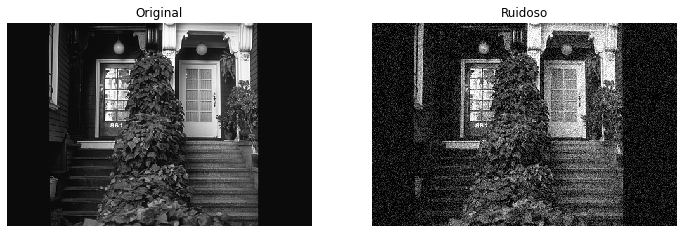

In [13]:
mostrar_lado_a_lado(imagens=[imgs[50,:,:,0], noisy[50,:,:,0]], titulos=['Original', 'Ruidoso'])

## PSNR e SSIM médio das imagens ruidosas

In [ ]:
psnr = PSNR(imgs, noisy)
ssim = SSIM(imgs, noisy)

In [14]:
print('PSNR médio: %.2f dB, SSIM médio: %.2f' % (psnr.mean(), ssim.mean()))

PSNR médio: 20.31 dB, SSIM médio: 0.39


# 1 - BM3D

In [15]:
imagens_filtradas = BM3D(noisy, noise_std_dev=0.1)
imagens_filtradas = adiciona_a_dimensao_das_cores(imagens_filtradas)
imagens_filtradas.shape

In [ ]:
psnr = PSNR(imgs, imagens_filtradas)
ssim = SSIM(imgs, imagens_filtradas)

In [19]:
print('PSNR médio: %.2f dB, SSIM médio: %.2f' % (psnr.mean(), ssim.mean()))

PSNR médio: 25.15 dB, SSIM médio: 0.74


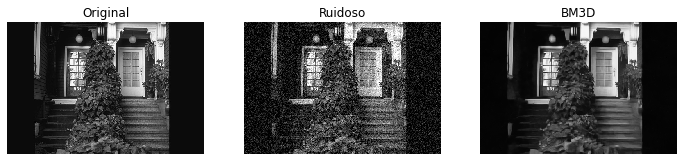

In [20]:
mostrar_lado_a_lado(imagens=[imgs[50,:,:,0], noisy[50,:,:,0], imagens_filtradas[50,:,:,0]], titulos=['Original', 'Ruidoso', 'BM3D'])

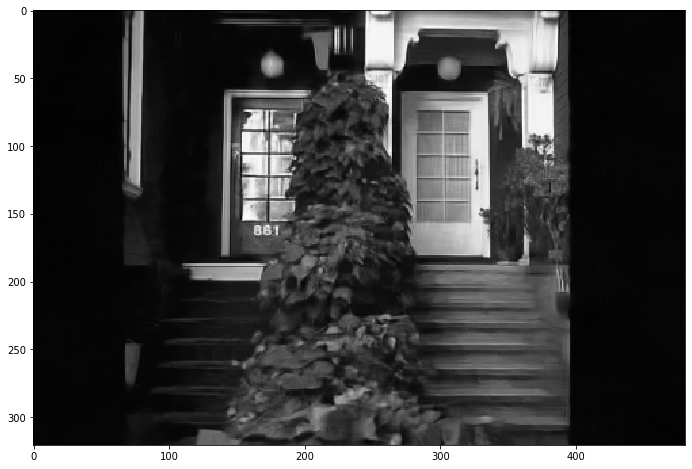

In [21]:
show(imagens_filtradas[50,:,:,0])

# 2 - Non Local Means

In [10]:
from denoising.non_local_means import NLM

In [11]:
nlm_images = NLM(noisy, noise_std_dev=0.1, show_progress=True)

100%|██████████| 137/137 [03:27<00:00,  1.51s/it]


In [13]:
nlm_images = adiciona_a_dimensao_das_cores(nlm_images)
nlm_images.shape

(137, 321, 481, 1)

In [ ]:
psnr = PSNR(imgs, nlm_images)
ssim = SSIM(imgs, nlm_images)

In [14]:
print('PSNR médio: %.2f dB, SSIM médio: %.2f' % (psnr.mean(), ssim.mean()))

PSNR médio: 26.09 dB, SSIM médio: 0.69


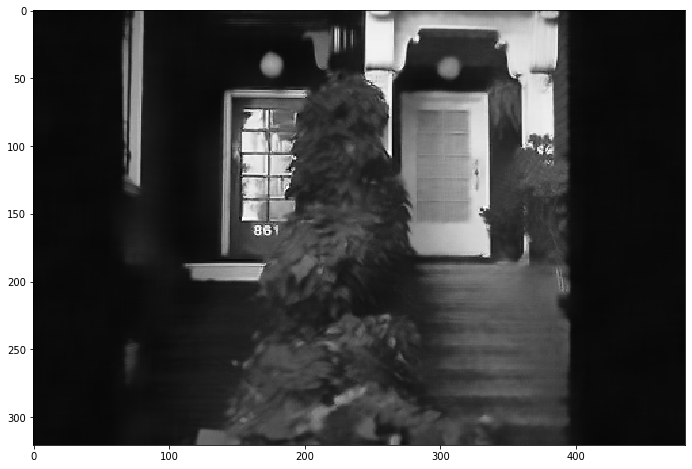

In [15]:
show(nlm_images[50,:,:,0])

# 3 - Filtro de Wiener

In [6]:
from denoising.wiener import wiener_filter

In [7]:
wiener_images = wiener_filter(noisy, noise_std_dev=0.1, show_progress=True)

  0%|          | 0/137 [00:00<?, ?it/s]/media/darlan/DATA2/deeplearning-projects/tensorflow-gpu/tensorflow-gpu/lib/python3.7/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/media/darlan/DATA2/deeplearning-projects/tensorflow-gpu/tensorflow-gpu/lib/python3.7/site-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
100%|██████████| 137/137 [00:04<00:00, 29.96it/s]


In [10]:
wiener_images = adiciona_a_dimensao_das_cores(wiener_images)

In [ ]:
psnr = PSNR(imgs, wiener_images)
ssim = SSIM(imgs, wiener_images)

In [11]:
print('PSNR médio: %.2f dB, SSIM médio: %.2f' % (psnr.mean(), ssim.mean()))

PSNR médio: 26.00 dB, SSIM médio: 0.64


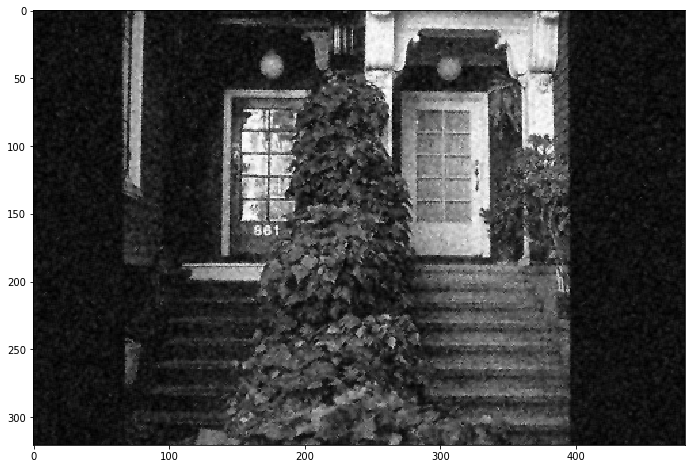

In [12]:
show(wiener_images[50,:,:,0])

# 4 - Wavelet Soft Thresholding

In [7]:
from denoising.wavelet import wavelet_soft_thresholding

In [8]:
wsoft_images = wavelet_soft_thresholding(noisy, noise_std_dev=0.1, show_progress=True)

  0%|          | 0/137 [00:00<?, ?it/s]/media/darlan/DATA2/deeplearning-projects/phantoms/code/denoising/wavelet.py:31: FutureWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  else:
100%|██████████| 137/137 [00:01<00:00, 80.68it/s]


In [10]:
wsoft_images = adiciona_a_dimensao_das_cores(wsoft_images)

In [ ]:
psnr = PSNR(imgs, wsoft_images)
ssim = SSIM(imgs, wsoft_images)

In [11]:
print('PSNR médio: %.2f dB, SSIM médio: %.2f' % (psnr.mean(), ssim.mean()))

PSNR médio: 23.35 dB, SSIM médio: 0.69


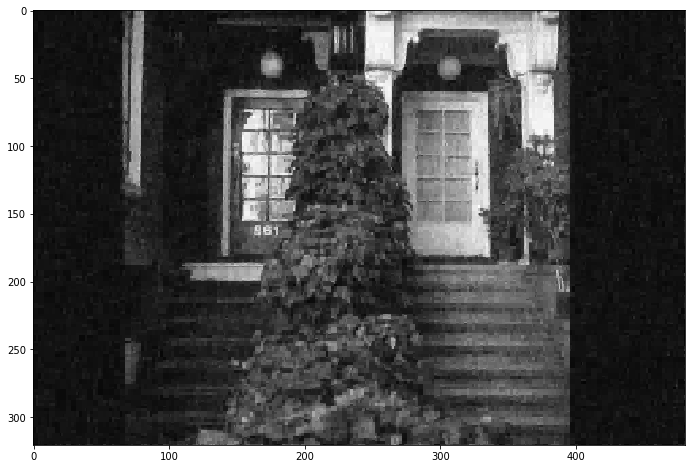

In [12]:
show(wsoft_images[50,:,:,0])

# Algoritmos funcionando:
* BM3D
* NLM
* Filtro de Wiener
* Wavelet Soft Thresholding